In [54]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset 1

In [55]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [56]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [57]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [58]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [59]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

In [60]:
def sum_days(w, indices):
    summed = []
    new_indices = []
    sum_ = 0
    current_i = None
    for idx, i in enumerate(indices):
        if current_i != i:
            if current_i is not None:
                summed.append(sum_)
                new_indices.append(current_i)
                
            current_i = int(i)
            sum_ = w[idx]
        else:
            # current i matches, sum them
            sum_ += w[idx]
            
    return summed, new_indices

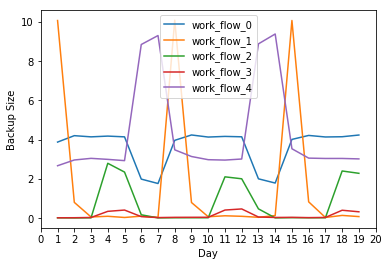

In [61]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])

summed, new_indices = sum_days(w_0, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

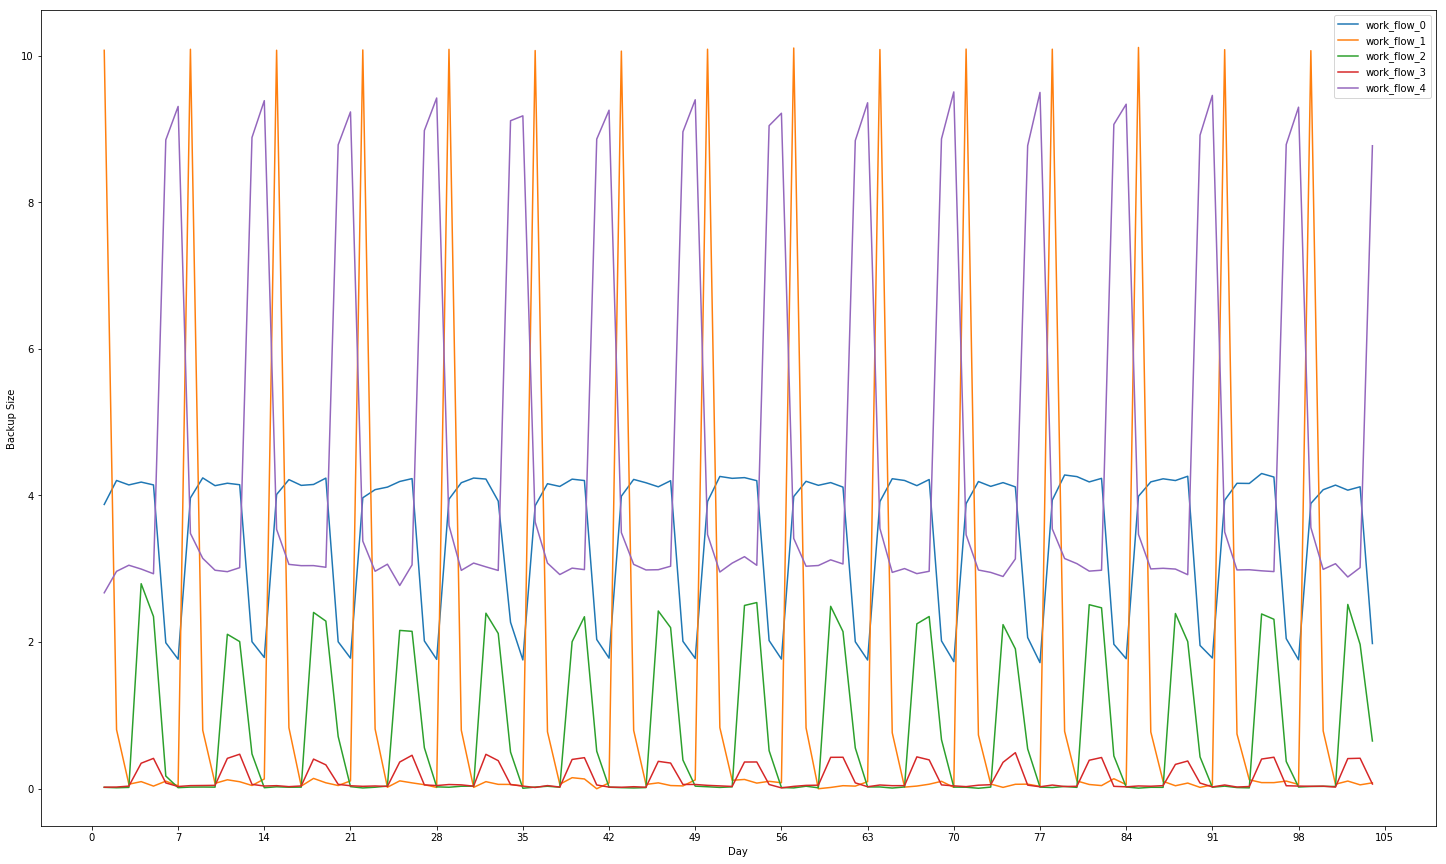

In [62]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.zeros(total_idx)
w_1 = np.zeros(total_idx)
w_2 = np.zeros(total_idx)
w_3 = np.zeros(total_idx)
w_4 = np.zeros(total_idx)
# w_0[:] = np.nan
# w_1[:] = np.nan
# w_2[:] = np.nan
# w_3[:] = np.nan
# w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = w_0[i] + bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = w_1[i] + bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = w_2[i] + bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = w_3[i] + bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = w_4[i] + bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))

summed, new_indices = sum_days(w_0[np.isfinite(w_0)], day_idx[np.isfinite(w_0)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1[np.isfinite(w_1)], day_idx[np.isfinite(w_1)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2[np.isfinite(w_2)], day_idx[np.isfinite(w_2)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3[np.isfinite(w_3)], day_idx[np.isfinite(w_3)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4[np.isfinite(w_4)], day_idx[np.isfinite(w_4)])
plt.plot(new_indices, summed)

plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

## Scalar Encoding

In [25]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [11]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [12]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10303539344689733
RMSE Testing for fold 0 = 0.10845567097417186
RMSE Training for fold 1 = 0.10419089612177095
RMSE Testing for fold 1 = 0.09802045254832206
RMSE Training for fold 2 = 0.10349185745093904
RMSE Testing for fold 2 = 0.10447346688262305
RMSE Training for fold 3 = 0.10344469887189557
RMSE Testing for fold 3 = 0.10490538873653102
RMSE Training for fold 4 = 0.1025899769379141
RMSE Testing for fold 4 = 0.11222617684153978
RMSE Training for fold 5 = 0.1030302651199911
RMSE Testing for fold 5 = 0.10850493306300102
RMSE Training for fold 6 = 0.10450952572006245
RMSE Testing for fold 6 = 0.09492755358007658
RMSE Training for fold 7 = 0.10398159298299949
RMSE Testing for fold 7 = 0.10000759755069878
RMSE Training for fold 8 = 0.1036367084864887
RMSE Testing for fold 8 = 0.10317625379266929
RMSE Training for fold 9 = 0.10396055800882181
RMSE Testing for fold 9 = 0.10019529711302326


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [13]:
print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))

Average RMSE Training = 0.10358714731477806
Average RMSE Testing = 0.10348927910826566


#### Scatter Plots

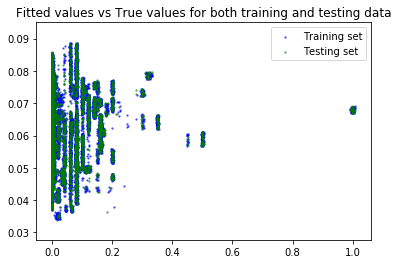

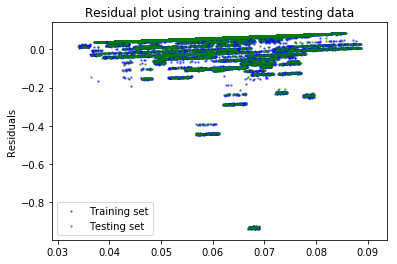

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Parameters for RadomForestRegressor
Num_trees = 20
Depth_trees = 4
Bootstrap = True
Max_features = 5

In [21]:
model = RandomForestRegressor(n_estimators = Num_trees, max_features = Max_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
num_folds = 10

Y_encoded_rf = Y_encoded.ravel()


## (2) i

In [18]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
oob_error_per_fold = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    oob_error = 1 - model.oob_score_
    oob_error_per_fold.append(oob_error)
    print('----------------------------------------------------')
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Out of Bag error for fold {} = {}'.format(i, oob_error))
    print('----------------------------------------------------')
    i = i + 1

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


----------------------------------------------------
RMSE Training for fold 0 = 0.060342718323088906
RMSE Testing for fold 0 = 0.06600103122494523
Out of Bag error for fold 0 = 0.3422191688756486
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 1 = 0.05999354404077284
RMSE Testing for fold 1 = 0.05318740413550893
Out of Bag error for fold 1 = 0.334175430446894
----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


----------------------------------------------------
RMSE Training for fold 2 = 0.06070297993348546
RMSE Testing for fold 2 = 0.06200857336669701
Out of Bag error for fold 2 = 0.3418665442449461
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 3 = 0.060227733092934436
RMSE Testing for fold 3 = 0.06623514605665273
Out of Bag error for fold 3 = 0.3369150802713663
----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


----------------------------------------------------
RMSE Training for fold 4 = 0.05982159473119974
RMSE Testing for fold 4 = 0.0622506437717224
Out of Bag error for fold 4 = 0.3403855824932449
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 5 = 0.06030482955967637
RMSE Testing for fold 5 = 0.06633429241801071
Out of Bag error for fold 5 = 0.34033955939962013
----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


----------------------------------------------------
RMSE Training for fold 6 = 0.06066202054205524
RMSE Testing for fold 6 = 0.053184772935539554
Out of Bag error for fold 6 = 0.33606049192430976
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 7 = 0.060589565741104454
RMSE Testing for fold 7 = 0.05662312472349231
Out of Bag error for fold 7 = 0.3390706702553714
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 8 = 0.06084161060273395
RMSE Testing for fold 8 = 0.06178033569929699
Out of Bag error for fold 8 = 0.3417962938503758
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 9 = 0.06141660589675676
RMSE Testing for fold 9 = 0.05618073772151881
Out of Bag error for fold 9 = 0.3461750723884218
----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [19]:
print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))
print('Average Out of Bag Error = {}'.format(np.mean(oob_error_per_fold)))

Average RMSE Training = 0.06049032024638081
Average RMSE Testing = 0.06037860620533847
Average Out of Bag Error = 0.3399003894150199


## (2) ii

In [43]:
features_array = np.arange(1,6)
trees_array = np.arange(1,201)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 1
Number of features = 1
RMSE Training = 0.0823494804595731
RMSE Testing = 0.08283825378858026
Out of Bag error = 1.0798942445035107
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 2
Number of features = 1
RMSE Training = 0.08246242451041672
RMSE Testing = 0.08236891188157434
Out of Bag error = 0.9424330057816268
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 1
RMSE Training = 0.07700968909257182
RMSE Testing = 0.07729087270993668
Out of Bag error = 0.8086883660957028
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 1
RMSE Training = 0.07721935004206128
RMSE Testing = 0.07707896370361683
Out of Bag error = 0.7332061780309468
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 5
Number of features = 1
RMSE Training = 0.07863996660341205
RMSE Testing = 0.07854574300100362
Out of Bag error = 0.7091519144356438
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 6
Number of features = 1
RMSE Training = 0.0769363463805625
RMSE Testing = 0.07721853154745752
Out of Bag error = 0.652577364919106
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 7
Number of features = 1
RMSE Training = 0.07817899517714692
RMSE Testing = 0.07830310363208996
Out of Bag error = 0.6411896230990621
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 8
Number of features = 1
RMSE Training = 0.07638903068808353
RMSE Testing = 0.07636637230657327
Out of Bag error = 0.6078084706214314
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 9
Number of features = 1
RMSE Training = 0.0780297522723633
RMSE Testing = 0.07796337708701274
Out of Bag error = 0.6109831026909391
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 10
Number of features = 1
RMSE Training = 0.07801569170501642
RMSE Testing = 0.07816308286579876
Out of Bag error = 0.6053342525686438
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 11
Number of features = 1
RMSE Training = 0.07488855239588874
RMSE Testing = 0.0750597476921647
Out of Bag error = 0.5603137511586556
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 12
Number of features = 1
RMSE Training = 0.07624367889486336
RMSE Testing = 0.07613668278127306
Out of Bag error = 0.5680860332335186
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 13
Number of features = 1
RMSE Training = 0.0750797633541285
RMSE Testing = 0.07519365927505199
Out of Bag error = 0.551779443641419
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 14
Number of features = 1
RMSE Training = 0.07536183743217255
RMSE Testing = 0.07535394691109602
Out of Bag error = 0.5549605720167998
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 15
Number of features = 1
RMSE Training = 0.07743813429749472
RMSE Testing = 0.07722647518373568
Out of Bag error = 0.580024430246438
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 16
Number of features = 1
RMSE Training = 0.07618056512651251
RMSE Testing = 0.07630961188411545
Out of Bag error = 0.5583260317490131
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 17
Number of features = 1
RMSE Training = 0.07750537942593308
RMSE Testing = 0.07758514483885923
Out of Bag error = 0.5766389838922714
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 18
Number of features = 1
RMSE Training = 0.078374541301954
RMSE Testing = 0.07843413042284367
Out of Bag error = 0.5881840900894801
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 19
Number of features = 1
RMSE Training = 0.07612144226345642
RMSE Testing = 0.0760127377219748
Out of Bag error = 0.5558869008133287
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 20
Number of features = 1
RMSE Training = 0.07562922962849987
RMSE Testing = 0.07548020647252797
Out of Bag error = 0.5462728530029385
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 21
Number of features = 1
RMSE Training = 0.07631871945238278
RMSE Testing = 0.07633118384670001
Out of Bag error = 0.5527747369459928
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 22
Number of features = 1
RMSE Training = 0.07748464330222933
RMSE Testing = 0.07758514654811037
Out of Bag error = 0.5696295020902284
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 23
Number of features = 1
RMSE Training = 0.07658261461225616
RMSE Testing = 0.07660933485830759
Out of Bag error = 0.5557432169830344
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 24
Number of features = 1
RMSE Training = 0.07650060621082821
RMSE Testing = 0.07666614202120393
Out of Bag error = 0.5542164496720027
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 25
Number of features = 1
RMSE Training = 0.07548103514942568
RMSE Testing = 0.07560117094875803
Out of Bag error = 0.5415250778391896
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 26
Number of features = 1
RMSE Training = 0.07632516787758371
RMSE Testing = 0.0763062921015964
Out of Bag error = 0.5513046957639924
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 27
Number of features = 1
RMSE Training = 0.07544981335578578
RMSE Testing = 0.07554968401705917
Out of Bag error = 0.5368631671022817
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 28
Number of features = 1
RMSE Training = 0.07525868403669272
RMSE Testing = 0.07524707605464637
Out of Bag error = 0.5358115785056431
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 29
Number of features = 1
RMSE Training = 0.07665226834823699
RMSE Testing = 0.07675569718446554
Out of Bag error = 0.5546467958625863
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 30
Number of features = 1
RMSE Training = 0.0761936567956908
RMSE Testing = 0.07611522902481274
Out of Bag error = 0.5495200058810872
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 31
Number of features = 1
RMSE Training = 0.07651646260339953
RMSE Testing = 0.0766205511856137
Out of Bag error = 0.5524115904208368
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 32
Number of features = 1
RMSE Training = 0.07584099063661298
RMSE Testing = 0.07580396577837398
Out of Bag error = 0.5414660381996333
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 33
Number of features = 1
RMSE Training = 0.07540698077485537
RMSE Testing = 0.07530173457795059
Out of Bag error = 0.5360907623890065
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 34
Number of features = 1
RMSE Training = 0.07581859200854627
RMSE Testing = 0.07591589243408299
Out of Bag error = 0.5407673686894209
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 35
Number of features = 1
RMSE Training = 0.07529211184476055
RMSE Testing = 0.07526453446374134
Out of Bag error = 0.5328883064921333
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 36
Number of features = 1
RMSE Training = 0.07565883099995116
RMSE Testing = 0.07575255029759534
Out of Bag error = 0.5403240107848742
----------

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 3
Number of features = 2
RMSE Training = 0.06487242306434574
RMSE Testing = 0.06451966982478567
Out of Bag error = 0.6787140736816983
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 2
RMSE Training = 0.0644133809511976
RMSE Testing = 0.064661660735457
Out of Bag error = 0.5829130983855079
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 5
Number of features = 2
RMSE Training = 0.0663598040395997
RMSE Testing = 0.06682981965883114
Out of Bag error = 0.5553033135410621
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 6
Number of features = 2
RMSE Training = 0.06519051388152254
RMSE Testing = 0.06462270035134408
Out of Bag error = 0.5105767700601486
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 7
Number of features = 2
RMSE Training = 0.0662196346450886
RMSE Testing = 0.06632569903368388
Out of Bag error = 0.4909468012970565
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 8
Number of features = 2
RMSE Training = 0.06622372357429944
RMSE Testing = 0.06615809942121673
Out of Bag error = 0.4684481073230691
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 9
Number of features = 2
RMSE Training = 0.06434115889543943
RMSE Testing = 0.06428319661123529
Out of Bag error = 0.4369225878897531
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 10
Number of features = 2
RMSE Training = 0.06512096032761854
RMSE Testing = 0.06530886838787078
Out of Bag error = 0.4334347210704312
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 11
Number of features = 2
RMSE Training = 0.06430791734155433
RMSE Testing = 0.06412010408765621
Out of Bag error = 0.4175385710403421
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 12
Number of features = 2
RMSE Training = 0.06505826462743876
RMSE Testing = 0.06478348740750697
Out of Bag error = 0.41916837216229197
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 13
Number of features = 2
RMSE Training = 0.06484481459821478
RMSE Testing = 0.06480105566516324
Out of Bag error = 0.41579271024683007
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 14
Number of features = 2
RMSE Training = 0.0642547747464278
RMSE Testing = 0.06401117330414106
Out of Bag error = 0.40910130060997174
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 15
Number of features = 2
RMSE Training = 0.06436675614441278
RMSE Testing = 0.06407040976893327
Out of Bag error = 0.4037411212200661
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 16
Number of features = 2
RMSE Training = 0.06390500870817678
RMSE Testing = 0.06396442350234294
Out of Bag error = 0.3993135463826897
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 17
Number of features = 2
RMSE Training = 0.06511954501375637
RMSE Testing = 0.0650432562587933
Out of Bag error = 0.41099033717619193
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 18
Number of features = 2
RMSE Training = 0.06487464959261156
RMSE Testing = 0.0648198658129944
Out of Bag error = 0.40680368135490824
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 19
Number of features = 2
RMSE Training = 0.06362128189895408
RMSE Testing = 0.06365153654423275
Out of Bag error = 0.3908470464974198
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 20
Number of features = 2
RMSE Training = 0.06215976611859999
RMSE Testing = 0.061999044921853964
Out of Bag error = 0.3713279696234391
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 21
Number of features = 2
RMSE Training = 0.06557541526636546
RMSE Testing = 0.06573811694814168
Out of Bag error = 0.4118586293363878
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 22
Number of features = 2
RMSE Training = 0.06616864279425463
RMSE Testing = 0.06636917574584694
Out of Bag error = 0.4205290160009133
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 23
Number of features = 2
RMSE Training = 0.06459936873664758
RMSE Testing = 0.0646836264797117
Out of Bag error = 0.4001268313177896
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 24
Number of features = 2
RMSE Training = 0.06480807125517422
RMSE Testing = 0.06479376896372703
Out of Bag error = 0.400757158343614
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 25
Number of features = 2
RMSE Training = 0.06364801512176574
RMSE Testing = 0.06373716818129668
Out of Bag error = 0.3865154653635585
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 26
Number of features = 2
RMSE Training = 0.06486145155546025
RMSE Testing = 0.06492146568425641
Out of Bag error = 0.4009342596891525
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 27
Number of features = 2
RMSE Training = 0.06430086590674514
RMSE Testing = 0.0642827612311269
Out of Bag error = 0.3933189498615797
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 28
Number of features = 2
RMSE Training = 0.06511240375853918
RMSE Testing = 0.06491288401663023
Out of Bag error = 0.40361938738509606
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 29
Number of features = 2
RMSE Training = 0.06352262784653906
RMSE Testing = 0.06347215596536432
Out of Bag error = 0.3830497223854249
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 30
Number of features = 2
RMSE Training = 0.06450185011422013
RMSE Testing = 0.06454044515427419
Out of Bag error = 0.39433857076111345
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 31
Number of features = 2
RMSE Training = 0.06416644479346552
RMSE Testing = 0.06420587550875544
Out of Bag error = 0.39156595781872333
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 32
Number of features = 2
RMSE Training = 0.06446683994288313
RMSE Testing = 0.06434757485427642
Out of Bag error = 0.3926509477259156
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 33
Number of features = 2
RMSE Training = 0.06441247030027095
RMSE Testing = 0.06453441642732527
Out of Bag error = 0.39221102094753507
-------

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 3
Number of features = 3
RMSE Training = 0.061202182678221674
RMSE Testing = 0.06121238092300961
Out of Bag error = 0.6240928441127434
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
RMSE Training = 0.059894405324473654
RMSE Testing = 0.059656244194449384
Out of Bag error = 0.5281402117824234
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 5
Number of features = 3
RMSE Training = 0.06138008488929333
RMSE Testing = 0.061709006034034855
Out of Bag error = 0.4874484801391616
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 6
Number of features = 3
RMSE Training = 0.061923913272474165
RMSE Testing = 0.06164440082534928
Out of Bag error = 0.44906090621213773
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 7
Number of features = 3
RMSE Training = 0.06164181287418358
RMSE Testing = 0.06149302032079954
Out of Bag error = 0.4200279728394487
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 8
Number of features = 3
RMSE Training = 0.061698016479165264
RMSE Testing = 0.06150613201623101
Out of Bag error = 0.39892114483185404
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 9
Number of features = 3
RMSE Training = 0.060935816472520256
RMSE Testing = 0.0609529284673679
Out of Bag error = 0.37978340465360527
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 10
Number of features = 3
RMSE Training = 0.06127626635171092
RMSE Testing = 0.06135688488768567
Out of Bag error = 0.3777089714168403
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 11
Number of features = 3
RMSE Training = 0.060073485315508136
RMSE Testing = 0.06009569282024065
Out of Bag error = 0.35819510706166297
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 12
Number of features = 3
RMSE Training = 0.06141701157037845
RMSE Testing = 0.061365552055427555
Out of Bag error = 0.3718622843964467
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 13
Number of features = 3
RMSE Training = 0.06132937024780869
RMSE Testing = 0.06105013722351488
Out of Bag error = 0.36387576408508016
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 14
Number of features = 3
RMSE Training = 0.0617761665389836
RMSE Testing = 0.06200491458424704
Out of Bag error = 0.371484348422994
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 15
Number of features = 3
RMSE Training = 0.059910818075094775
RMSE Testing = 0.05970959090253096
Out of Bag error = 0.348452090012462
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 16
Number of features = 3
RMSE Training = 0.061197908451467664
RMSE Testing = 0.06114343412960055
Out of Bag error = 0.3603435947838507
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 17
Number of features = 3
RMSE Training = 0.060809465513254335
RMSE Testing = 0.06092085145838756
Out of Bag error = 0.3519935020158699
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 18
Number of features = 3
RMSE Training = 0.06065813972233147
RMSE Testing = 0.06062475790828999
Out of Bag error = 0.35155417890115526
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 19
Number of features = 3
RMSE Training = 0.06094977746338827
RMSE Testing = 0.06089806474481897
Out of Bag error = 0.3538944786111735
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 20
Number of features = 3
RMSE Training = 0.06034146644632125
RMSE Testing = 0.06028089437117893
Out of Bag error = 0.34760298500235715
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 21
Number of features = 3
RMSE Training = 0.06140212329287655
RMSE Testing = 0.06131345506190292
Out of Bag error = 0.3581428652125612
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 22
Number of features = 3
RMSE Training = 0.06063846173170615
RMSE Testing = 0.060598510153520836
Out of Bag error = 0.35010134184588815
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 23
Number of features = 3
RMSE Training = 0.06105689861615602
RMSE Testing = 0.0609852755258435
Out of Bag error = 0.3536024145647128
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 24
Number of features = 3
RMSE Training = 0.06141989592914422
RMSE Testing = 0.06138488651079797
Out of Bag error = 0.35686888297736785
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 25
Number of features = 3
RMSE Training = 0.06048517956058511
RMSE Testing = 0.060381439485088576
Out of Bag error = 0.3460494064825067
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 26
Number of features = 3
RMSE Training = 0.06102609018043307
RMSE Testing = 0.06093999156621187
Out of Bag error = 0.35115264487337966
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 27
Number of features = 3
RMSE Training = 0.06081501914167149
RMSE Testing = 0.06086725558003485
Out of Bag error = 0.34995281985083226
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 28
Number of features = 3
RMSE Training = 0.060351737654026204
RMSE Testing = 0.06026179512820079
Out of Bag error = 0.34395089361486464
-----

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 30
Number of features = 3
RMSE Training = 0.060375685119655076
RMSE Testing = 0.06019375744622302
Out of Bag error = 0.3451857687826104
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 31
Number of features = 3
RMSE Training = 0.06091698669768365
RMSE Testing = 0.060834482910836665
Out of Bag error = 0.3496806008329285
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 32
Number of features = 3
RMSE Training = 0.0603522501165095
RMSE Testing = 0.06033635148432213
Out of Bag error = 0.3440668368960028
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 33
Number of features = 3
RMSE Training = 0.06064061420491705
RMSE Testing = 0.060534614571547254
Out of Bag error = 0.34699970407591424
-------

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 2
Number of features = 4
RMSE Training = 0.0624149760545714
RMSE Testing = 0.0625513990489035
Out of Bag error = 0.768686850974345
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 4
RMSE Training = 0.06247988883026455
RMSE Testing = 0.06204564554594899
Out of Bag error = 0.61496979821353
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 4
RMSE Training = 0.0615014623675554
RMSE Testing = 0.06159492015431214
Out of Bag error = 0.5278360340266047
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 5
Number of features = 4
RMSE Training = 0.06160913156835167
RMSE Testing = 0.061383865268429504
Out of Bag error = 0.46251462122022124
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 6
Number of features = 4
RMSE Training = 0.06132364737970385
RMSE Testing = 0.06130166113151372
Out of Bag error = 0.42674838784162505
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 7
Number of features = 4
RMSE Training = 0.06123026111351374
RMSE Testing = 0.06110618248553681
Out of Bag error = 0.3961969015271327
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 8
Number of features = 4
RMSE Training = 0.06155600535835478
RMSE Testing = 0.06126807421089649
Out of Bag error = 0.3878838937484169
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 9
Number of features = 4
RMSE Training = 0.06167336302116192
RMSE Testing = 0.06158846594006345
Out of Bag error = 0.3726181914456862
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 10
Number of features = 4
RMSE Training = 0.06091190741063583
RMSE Testing = 0.06086388827637057
Out of Bag error = 0.3610159741723852
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 11
Number of features = 4
RMSE Training = 0.06130223343992548
RMSE Testing = 0.06128178958743534
Out of Bag error = 0.35927355812537504
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 12
Number of features = 4
RMSE Training = 0.06116055054491849
RMSE Testing = 0.06106334541168342
Out of Bag error = 0.3549954834185199
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 13
Number of features = 4
RMSE Training = 0.060998430514659675
RMSE Testing = 0.06079251958832349
Out of Bag error = 0.35299582332932067
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 14
Number of features = 4
RMSE Training = 0.060836362126178455
RMSE Testing = 0.06066256261776468
Out of Bag error = 0.3498292952300833
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 15
Number of features = 4
RMSE Training = 0.060873163507187744
RMSE Testing = 0.060808667149011286
Out of Bag error = 0.3497604866762827
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 16
Number of features = 4
RMSE Training = 0.06061544757216536
RMSE Testing = 0.06057025144962257
Out of Bag error = 0.3458474368297687
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 17
Number of features = 4
RMSE Training = 0.06084252727042494
RMSE Testing = 0.06080246092048817
Out of Bag error = 0.34660515660765095
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 18
Number of features = 4
RMSE Training = 0.06079823687803676
RMSE Testing = 0.06070200330774241
Out of Bag error = 0.3453835586718533
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 19
Number of features = 4
RMSE Training = 0.060671217058017236
RMSE Testing = 0.06052508423873683
Out of Bag error = 0.3451124217227414
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 20
Number of features = 4
RMSE Training = 0.06133128374509785
RMSE Testing = 0.06126421367209876
Out of Bag error = 0.3506528790102406
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 21
Number of features = 4
RMSE Training = 0.06084132600511309
RMSE Testing = 0.06071607826143214
Out of Bag error = 0.34544187451641445
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 22
Number of features = 4
RMSE Training = 0.061091267021912955
RMSE Testing = 0.06103577145569168
Out of Bag error = 0.3486954683569904
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 23
Number of features = 4
RMSE Training = 0.06121797121682471
RMSE Testing = 0.06108657953810035
Out of Bag error = 0.3490989334514982
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 24
Number of features = 4
RMSE Training = 0.06096410487616257
RMSE Testing = 0.060961726092832166
Out of Bag error = 0.3466600878678811
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 25
Number of features = 4
RMSE Training = 0.06094814300147363
RMSE Testing = 0.060898995141142845
Out of Bag error = 0.3468295416027555
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 26
Number of features = 4
RMSE Training = 0.061004208841215025
RMSE Testing = 0.060921125221089424
Out of Bag error = 0.34684226925772954
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 27
Number of features = 4
RMSE Training = 0.06113235948900906
RMSE Testing = 0.06102763495972748
Out of Bag error = 0.34804506463535495
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 28
Number of features = 4
RMSE Training = 0.06090459775712141
RMSE Testing = 0.06084043281210004
Out of Bag error = 0.34542219151867265
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 29
Number of features = 4
RMSE Training = 0.060708310704548255
RMSE Testing = 0.060637151549991705
Out of Bag error = 0.34320478303819374
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 30
Number of features = 4
RMSE Training = 0.060988187086323566
RMSE Testing = 0.06086628412812807
Out of Bag error = 0.3463913425874309
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 31
Number of features = 4
RMSE Training = 0.06095907901613247
RMSE Testing = 0.06079365754064634
Out of Bag error = 0.34664907979702814
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 32
Number of features = 4
RMSE Training = 0.06096464696630373
RMSE Testing = 0.06095371703892871
Out of Bag error = 0.3464643014684583
-----

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 33
Number of features = 4
RMSE Training = 0.06086266180185784
RMSE Testing = 0.060764766858585485
Out of Bag error = 0.34486150213068767
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 34
Number of features = 4
RMSE Training = 0.06095714464053971
RMSE Testing = 0.06082074291319921
Out of Bag error = 0.3449102624618317
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 35
Number of features = 4
RMSE Training = 0.06074326171351361
RMSE Testing = 0.06066023581446567
Out of Bag error = 0.34314904339924696
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 36
Number of features = 4
RMSE Training = 0.06096622595004042
RMSE Testing = 0.06089038333182094
Out of Bag error = 0.34622912011633733
------

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 2
Number of features = 5
RMSE Training = 0.06127097816599222
RMSE Testing = 0.06108258033302315
Out of Bag error = 0.7457310331684974
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 5
RMSE Training = 0.060535711467073774
RMSE Testing = 0.06059226282998461
Out of Bag error = 0.6046426749439033
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 5
RMSE Training = 0.06094126619709735
RMSE Testing = 0.060788925161511985
Out of Bag error = 0.4968494152250399
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 5
Number of features = 5
RMSE Training = 0.060940962970267284
RMSE Testing = 0.06080343877395228
Out of Bag error = 0.4414771142184938
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 6
Number of features = 5
RMSE Training = 0.0601712392672092
RMSE Testing = 0.06008858822741235
Out of Bag error = 0.40815849584155883
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 7
Number of features = 5
RMSE Training = 0.060426465117423646
RMSE Testing = 0.060320380081397965
Out of Bag error = 0.3847940722199362
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 8
Number of features = 5
RMSE Training = 0.06067381489332881
RMSE Testing = 0.06053130610240319
Out of Bag error = 0.3656173828018863
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 9
Number of features = 5
RMSE Training = 0.06085933781978516
RMSE Testing = 0.06075839412560078
Out of Bag error = 0.3599579305630957
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 10
Number of features = 5
RMSE Training = 0.06074987350266488
RMSE Testing = 0.06064520869907915
Out of Bag error = 0.35327625816796504
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 11
Number of features = 5
RMSE Training = 0.06072748011200113
RMSE Testing = 0.06065774630589947
Out of Bag error = 0.3490578324516167
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 12
Number of features = 5
RMSE Training = 0.0604371404628397
RMSE Testing = 0.06034942133242186
Out of Bag error = 0.34406431686372546
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 13
Number of features = 5
RMSE Training = 0.06061122647582209
RMSE Testing = 0.06051787334397015
Out of Bag error = 0.3432348129409606
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 14
Number of features = 5
RMSE Training = 0.060575192958832236
RMSE Testing = 0.06046266195682688
Out of Bag error = 0.3424739389866447
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 15
Number of features = 5
RMSE Training = 0.06041313027298841
RMSE Testing = 0.060317794691478265
Out of Bag error = 0.34022744854601134
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 16
Number of features = 5
RMSE Training = 0.06056545366855113
RMSE Testing = 0.060429807660394796
Out of Bag error = 0.3409988449257531
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 17
Number of features = 5
RMSE Training = 0.06068735121927106
RMSE Testing = 0.0605711324007566
Out of Bag error = 0.3415145507922735
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 18
Number of features = 5
RMSE Training = 0.06024688737300401
RMSE Testing = 0.06016560955667929
Out of Bag error = 0.33755380707374505
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 19
Number of features = 5
RMSE Training = 0.060510356857562154
RMSE Testing = 0.060478638430547904
Out of Bag error = 0.3402508808964576
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 20
Number of features = 5
RMSE Training = 0.060359102304168244
RMSE Testing = 0.060260581846648634
Out of Bag error = 0.33855963191988886
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 21
Number of features = 5
RMSE Training = 0.06072398954345293
RMSE Testing = 0.06062499305811937
Out of Bag error = 0.34150461427058093
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 22
Number of features = 5
RMSE Training = 0.06023892748963681
RMSE Testing = 0.06014636951763388
Out of Bag error = 0.33719419036890647
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 23
Number of features = 5
RMSE Training = 0.06049680098602008
RMSE Testing = 0.06037689130400801
Out of Bag error = 0.3399067148516989
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 24
Number of features = 5
RMSE Training = 0.06080526074608326
RMSE Testing = 0.06074795066583531
Out of Bag error = 0.3424588040245041
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 25
Number of features = 5
RMSE Training = 0.060690133842309944
RMSE Testing = 0.060572647044541725
Out of Bag error = 0.3414950141553378
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 26
Number of features = 5
RMSE Training = 0.060610737883301236
RMSE Testing = 0.06053243159304309
Out of Bag error = 0.34026317626356584
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 27
Number of features = 5
RMSE Training = 0.06051503720007836
RMSE Testing = 0.06039516344219642
Out of Bag error = 0.3395300723746448
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 28
Number of features = 5
RMSE Training = 0.06054966284189127
RMSE Testing = 0.060457920224559904
Out of Bag error = 0.3404886185154773
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 29
Number of features = 5
RMSE Training = 0.06076038934426713
RMSE Testing = 0.06067784818631734
Out of Bag error = 0.3417390466746008
-------

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 30
Number of features = 5
RMSE Training = 0.06049379008887886
RMSE Testing = 0.06038507416549031
Out of Bag error = 0.33926768855315753
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 31
Number of features = 5
RMSE Training = 0.060459232578001974
RMSE Testing = 0.06035721448693619
Out of Bag error = 0.3383707639832075
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 32
Number of features = 5
RMSE Training = 0.06063005199605759
RMSE Testing = 0.060555147907721076
Out of Bag error = 0.3403914238330229
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 33
Number of features = 5
RMSE Training = 0.060555768286412195
RMSE Testing = 0.060450489094746485
Out of Bag error = 0.33995809286091905
----

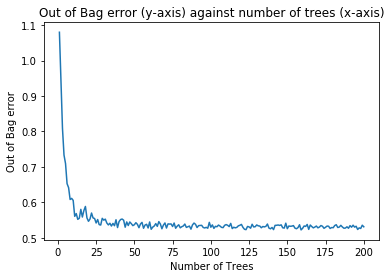

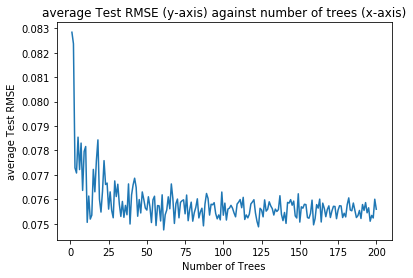

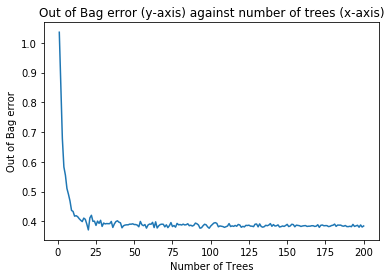

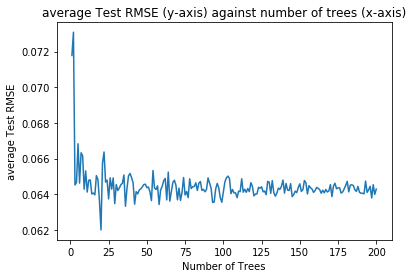

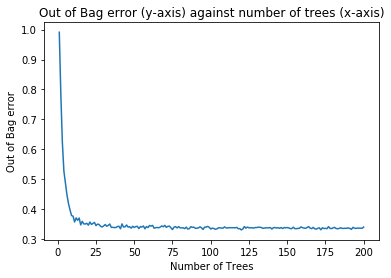

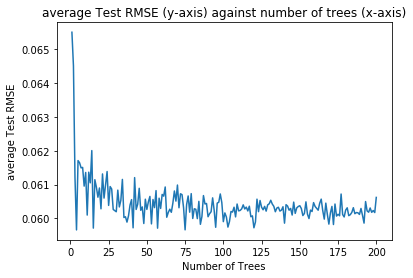

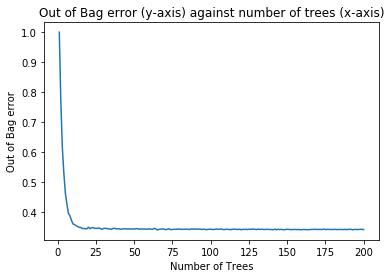

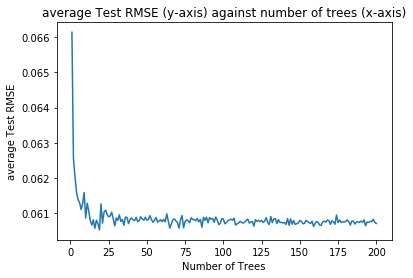

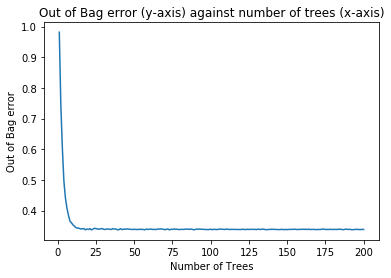

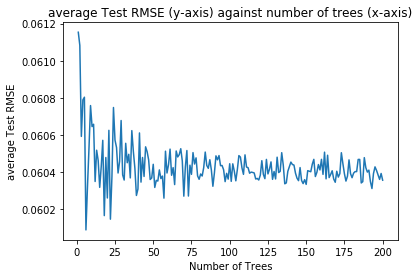

In [44]:
i = 0;
j = 0;
best = []
while i < len(features_array):
    total_rmse_per_fold_train = []
    total_rmse_per_fold_test = []
    total_oob_error_per_fold = []
    while j < len(trees_array):
        Num_trees = trees_array[j]
        Num_features = features_array[i]
        model = RandomForestRegressor(n_estimators = Num_trees, max_features = Num_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
        num_folds = 10
        kf = KFold(n_splits=num_folds)
        rmse_per_fold_train = []
        rmse_per_fold_test = []
        oob_error_per_fold = []
        k = 0
        for trainset, testset in kf.split(X_encoded):
            X_train, X_test = X_encoded[trainset], X_encoded[testset]
            y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
            rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
            oob_error = 1 - model.oob_score_
            oob_error_per_fold.append(oob_error)
        total_rmse_per_fold_train.append(np.mean(rmse_per_fold_train))
        total_rmse_per_fold_test.append(np.mean(rmse_per_fold_test))
        total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
        print('-----------------------------------------------------')
        print('Number of trees = %d' % Num_trees)
        print('Number of features = %d' % Num_features)
        print('RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
        print('RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))
        print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
        print('-----------------------------------------------------')
        j = j + 1
    best.append(np.argmin(total_rmse_per_fold_test))
    plt.figure()
    plt.plot(trees_array, total_oob_error_per_fold)
    plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('Out of Bag error')
    
    plt.figure()
    plt.plot(trees_array, total_rmse_per_fold_test)
    plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('average Test RMSE')
    j = 0
    i = i + 1

In [45]:
best

[60, 19, 3, 18, 5]

## (2) iii

In [17]:
depth_array = np.arange(1,41)
Best_num_features = 3
Best_num_trees = 4

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 1
RMSE Training = 0.09744766048996603
RMSE Testing = 0.09730819041210333
Out of Bag error = 0.9519461308140652
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 2
RMSE Training = 0.0867187586927833
RMSE Testing = 0.08653840903390667
Out of Bag error = 0.818206094149847
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 3
RMSE Training = 0.0783243175710688
RMSE Testing = 0.07809194419129804
Out of Bag error = 0.7177853657027449
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 4
RMSE Training = 0.06198155089474257
RMSE Testing = 0.061474473608275605
Out of Bag error = 0.5492388665047793
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 5
RMSE Training = 0.04603255354045528
RMSE Testing = 0.04631528500563094
Out of Bag error = 0.41381642709133787
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 6
RMSE Training = 0.030998384504294912
RMSE Testing = 0.03223120902126097
Out of Bag error = 0.3223520748081723
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 7
RMSE Training = 0.024498790136397004
RMSE Testing = 0.025070117485174542
Out of Bag error = 0.28817705722807047
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 8
RMSE Training = 0.017134900020134503
RMSE Testing = 0.018010377928302172
Out of Bag error = 0.24779290193445203
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 9
RMSE Training = 0.014425092319059848
RMSE Testing = 0.016452414524046496
Out of Bag error = 0.23687996859578453
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 10
RMSE Training = 0.012693519217498419
RMSE Testing = 0.014721250593285762
Out of Bag error = 0.2239169290944914
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 11
RMSE Training = 0.012017911382738533
RMSE Testing = 0.015466674282652157
Out of Bag error = 0.23260391008975842
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 12
RMSE Training = 0.011215324109979292
RMSE Testing = 0.014427438653534954
Out of Bag error = 0.2489874597029173
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 13
RMSE Training = 0.010194322616534534
RMSE Testing = 0.014549351750308479
Out of Bag error = 0.23266024877677527
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 14
RMSE Training = 0.009848162432703514
RMSE Testing = 0.015238253175404509
Out of Bag error = 0.2407605490512153
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 15
RMSE Training = 0.00939332899163858
RMSE Testing = 0.016117335925975907
Out of Bag error = 0.2470401864881699
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 16
RMSE Training = 0.009064652271374474
RMSE Testing = 0.015290090132875012
Out of Bag error = 0.24974216258790133
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 17
RMSE Training = 0.008462935651336396
RMSE Testing = 0.015588043773498284
Out of Bag error = 0.25370096219401617
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 18
RMSE Training = 0.008065137753239679
RMSE Testing = 0.015322555831926604
Out of Bag error = 0.23789689874771688
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 19
RMSE Training = 0.007747261245255854
RMSE Testing = 0.0158751930911148
Out of Bag error = 0.22994143116391452
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 20
RMSE Training = 0.008303238561576217
RMSE Testing = 0.01665362015873618
Out of Bag error = 0.23901452088456515
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 21
RMSE Training = 0.007757957133070115
RMSE Testing = 0.01610797487483718
Out of Bag error = 0.24661799893275468
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 22
RMSE Training = 0.007672386977117117
RMSE Testing = 0.015704665142253098
Out of Bag error = 0.23340437588035529
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 23
RMSE Training = 0.008186982421227862
RMSE Testing = 0.016096565867784976
Out of Bag error = 0.2523620297652452
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 24
RMSE Training = 0.00821365393489374
RMSE Testing = 0.01651123844877171
Out of Bag error = 0.2552094647342341
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 25
RMSE Training = 0.0075126627315455635
RMSE Testing = 0.01564842569578454
Out of Bag error = 0.23970480695034269
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 26
RMSE Training = 0.007841592274964008
RMSE Testing = 0.016305029823556375
Out of Bag error = 0.25319894940479143
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 27
RMSE Training = 0.007862998321788725
RMSE Testing = 0.01590058662975413
Out of Bag error = 0.2570075198325196
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 28
RMSE Training = 0.007714627404397531
RMSE Testing = 0.015629687540038573
Out of Bag error = 0.24341453388596848
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 29
RMSE Training = 0.008033825868003722
RMSE Testing = 0.01633489875186008
Out of Bag error = 0.24122756799485812
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 30
RMSE Training = 0.0077104130870081404
RMSE Testing = 0.015771666741426018
Out of Bag error = 0.2567786741325135
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 31
RMSE Training = 0.007667144076457697
RMSE Testing = 0.015605467622523087
Out of Bag error = 0.24127028987486848
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 32
RMSE Training = 0.007670658590843071
RMSE Testing = 0.015599814441104054
Out of Bag error = 0.25325850439731434
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 33
RMSE Training = 0.00793328493261828
RMSE Testing = 0.01593771589188875
Out of Bag error = 0.2467544782872491
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 34
RMSE Training = 0.007583663772697683
RMSE Testing = 0.015924560968099265
Out of Bag error = 0.24668070778833578
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 35
RMSE Training = 0.007866777892508541
RMSE Testing = 0.015594649851681427
Out of Bag error = 0.24703162864670433
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 36
RMSE Training = 0.007673803366320356
RMSE Testing = 0.015387818202939363
Out of Bag error = 0.23997080520167477
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 37
RMSE Training = 0.007729927958501977
RMSE Testing = 0.015285141406523603
Out of Bag error = 0.2377511173548088
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 38
RMSE Training = 0.007772351581268967
RMSE Testing = 0.01622127324186521
Out of Bag error = 0.25114435384335193
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 39
RMSE Training = 0.00794054213200324
RMSE Testing = 0.016411747549574376
Out of Bag error = 0.23599223518809742
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 40
RMSE Training = 0.008190429742953536
RMSE Testing = 0.015841847782126283
Out of Bag error = 0.24495821052400749
-----------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Text(0, 0.5, 'average Test RMSE')

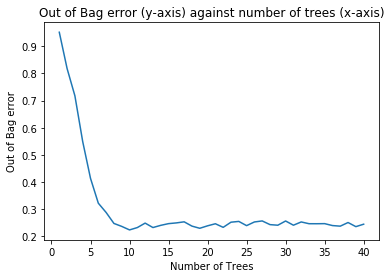

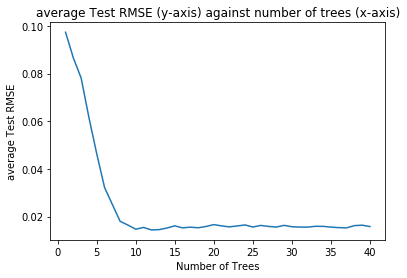

In [47]:
j = 0;
total_rmse_per_fold_train = []
total_rmse_per_fold_test = []
total_oob_error_per_fold = []
while j < len(depth_array):
    depth_trees = depth_array[j]
    model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = depth_trees, bootstrap = Bootstrap, oob_score=True)
    num_folds = 10
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    oob_error_per_fold = []
    k = 0
    for trainset, testset in kf.split(X_encoded):
        X_train, X_test = X_encoded[trainset], X_encoded[testset]
        y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
        oob_error = 1 - model.oob_score_
        oob_error_per_fold.append(oob_error)
    total_rmse_per_fold_train.append(np.mean(rmse_per_fold_train))
    total_rmse_per_fold_test.append(np.mean(rmse_per_fold_test))
    total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
    print('-----------------------------------------------------')
    print('Number of trees = %d' % Best_num_trees)
    print('Number of features = %d' % Best_num_features)
    print('Depth of trees = %d' % depth_trees)
    print('RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
    print('RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))
    print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
    print('-----------------------------------------------------')
    j = j + 1
    
best_depth = np.argmin(total_rmse_per_fold_test)

plt.figure()
plt.plot(depth_array, total_oob_error_per_fold)
plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag error')

plt.figure()
plt.plot(depth_array, total_rmse_per_fold_test)
plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('average Test RMSE')    
    


In [48]:
best_depth

11

## (2) iv

In [15]:
best_depth = 12

In [22]:
model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = best_depth, bootstrap = Bootstrap, oob_score=True)

model.fit(X_encoded,Y_encoded_rf)

importantFeatures = model.feature_importances_
print("Feature Importances for best Random Forest Regression : ", importantFeatures)

Feature Importances for best Random Forest Regression :  [0.25815588 0.11620591 0.39149211 0.00582445 0.22832165]


## Scatter Plots

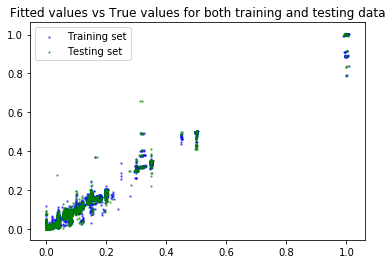

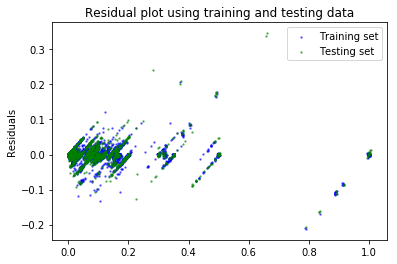

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded_rf, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## (2) v

In [25]:
from sklearn.tree import export_graphviz
import os

X_vis = df[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
Y_vis = df['Size of Backup (GB)']

model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = 4)

model.fit(X_encoded,Y_encoded_rf)

estimator = model.estimators_[0]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_vis.columns,
                class_names = Y_vis,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# for i in range(1,25):
#     export_graphviz(model.estimators_[0],
#                 feature_names=X_vis.columns,
#                 filled=True,
#                 rounded=True)
#     os.system('dot -Tpng tree.dot -o'+str(i)+'_tree.png')

## Neural Network

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
def model_scatter_plots(model, X_train, y_train, X_test, y_test):

    # Fitted values vs true values
    plt.figure()
    plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Fitted values vs True values for both training and testing data')
    # plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()

    plt.figure()
    # Residuals vs Fitted values
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Residual plot using training and testing data')
    plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()
    # predicted_Y = nn.predict(X_encoded)

In [17]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


In [18]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)
# print(enc.categories_)
# print(np.shape(enc.get_feature_names()))
# print(enc.get_feature_names())

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [132]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_relu = []
avg_test_rmses_relu = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_relu.append(np.mean(train_rmses))
    avg_test_rmses_relu.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08828075136570991
Average testing RMSE for hidden layer size 2 =  0.10689170590309924
 
Average training RMSE for hidden layer size 5 =  0.10290831652789663
Average testing RMSE for hidden layer size 5 =  0.1032727939822399
 
Average training RMSE for hidden layer size 10 =  0.02886032561674855
Average testing RMSE for hidden layer size 10 =  0.03935513712062509
 
Average training RMSE for hidden layer size 50 =  0.018077162570088397
Average testing RMSE for hidden layer size 50 =  0.05626987561372756
 
Average training RMSE for hidden layer size 100 =  0.017098587765273975
Average testing RMSE for hidden layer size 100 =  0.046802375495210144
 
Average training RMSE for hidden layer size 150 =  0.014962282027769733
Average testing RMSE for hidden layer size 150 =  0.030426449713720254
 
Average training RMSE for hidden layer size 200 =  0.01469230806138131
Average testing RMSE for hidden layer size 200 =  0.026233398975783518
 
Averag

In [136]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_logistic = []
avg_test_rmses_logistic = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='logistic', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_logistic.append(np.mean(train_rmses))
    avg_test_rmses_logistic.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08808108192058792
Average testing RMSE for hidden layer size 2 =  0.08898025441846827
 
Average training RMSE for hidden layer size 5 =  0.09354320464616969
Average testing RMSE for hidden layer size 5 =  0.09472625667393217
 
Average training RMSE for hidden layer size 10 =  0.08822168354719666
Average testing RMSE for hidden layer size 10 =  0.08992037605437428
 
Average training RMSE for hidden layer size 50 =  0.08875912765878816
Average testing RMSE for hidden layer size 50 =  0.09146318545192278
 
Average training RMSE for hidden layer size 100 =  0.08904707935673276
Average testing RMSE for hidden layer size 100 =  0.092093620430008
 
Average training RMSE for hidden layer size 150 =  0.08902637733345754
Average testing RMSE for hidden layer size 150 =  0.0906831563528114
 
Average training RMSE for hidden layer size 200 =  0.08973175371057117
Average testing RMSE for hidden layer size 200 =  0.09440559827728431
 
Average traini

In [134]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_tanh = []
avg_test_rmses_tanh = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='tanh', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.mean(train_rmses))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.mean(test_rmses))
    print(' ')
    
    avg_train_rmses_tanh.append(np.mean(train_rmses))
    avg_test_rmses_tanh.append(np.mean(test_rmses))

Average training RMSE for hidden layer size 2 =  0.08806051786066574
Average testing RMSE for hidden layer size 2 =  0.1045847037140895
 
Average training RMSE for hidden layer size 5 =  0.0879298714748257
Average testing RMSE for hidden layer size 5 =  0.08996297029032765
 
Average training RMSE for hidden layer size 10 =  0.06343199425209858
Average testing RMSE for hidden layer size 10 =  0.13265719114759794
 
Average training RMSE for hidden layer size 50 =  0.04121000719102465
Average testing RMSE for hidden layer size 50 =  0.06369807817626424
 
Average training RMSE for hidden layer size 100 =  0.03925399427801385
Average testing RMSE for hidden layer size 100 =  0.08738910271003547
 
Average training RMSE for hidden layer size 150 =  0.03134970364100455
Average testing RMSE for hidden layer size 150 =  0.04658124012874803
 
Average training RMSE for hidden layer size 200 =  0.0255650175130193
Average testing RMSE for hidden layer size 200 =  0.050438242504910656
 
Average train

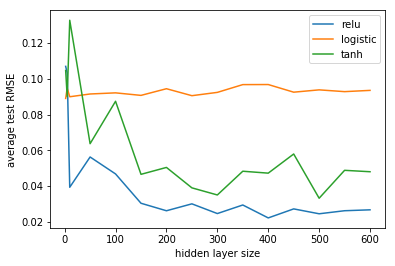

In [138]:
plt.figure()
plt.plot(layer_sizes, avg_test_rmses_relu)
plt.plot(layer_sizes, avg_test_rmses_logistic)
plt.plot(layer_sizes, avg_test_rmses_tanh)
plt.legend(['relu', 'logistic', 'tanh'])
plt.xlabel('hidden layer size')
plt.ylabel('average test RMSE')
plt.show()

In [142]:
print('Best combination: {} hidden layers with ReLU gives RMSE {}'.format(layer_sizes[np.argmin(avg_test_rmses_relu)], 
                                                                          np.min(avg_test_rmses_relu)))

Best combination: 400 hidden layers with ReLU gives RMSE 0.022235233473332016


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
best_layer_size = 400
best_activation = 'relu'

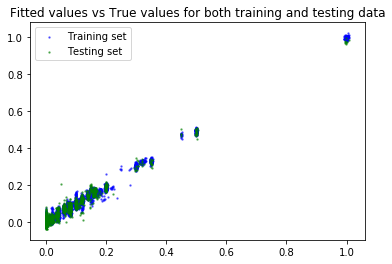

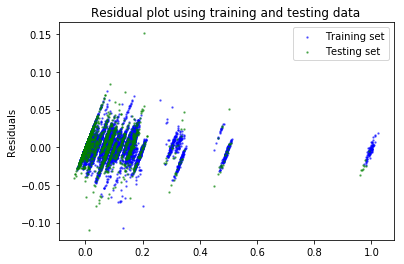

In [22]:
X_train, X_test, y_train, y_test = train_test_split(enc.transform(train_data), target_data, 
                                                    test_size=0.1, random_state=0)

nn = MLPRegressor(hidden_layer_sizes=(best_layer_size,), activation=best_activation, random_state=0)
nn.fit(X_train, y_train)

model_scatter_plots(nn, X_train, y_train, X_test, y_test)

## Predicting backup sizes for each workflow

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Linear Regression

In [25]:
data_wf0_enc = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_enc = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_enc = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_enc = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_enc = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_enc = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_enc = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_enc = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_enc = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_enc = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
def analyze_wf_se_lr(data, target):

    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    for trainset, testset in kf.split(data):
        X_train, X_test = data[trainset], data[testset]
        y_train, y_test = target[trainset], target[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
        rmse_per_fold_test.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    #     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    #     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    #     print(' ')
    print('Average train RMSE:', np.mean(rmse_per_fold_train))
    print('Average test RMSE:', np.mean(rmse_per_fold_test))

In [26]:
# Workflow 0

analyze_wf_se_lr(data_wf0_enc, target_wf0_enc)

Average train RMSE: 0.035835216405880534
Average test RMSE: 0.035856383635549126


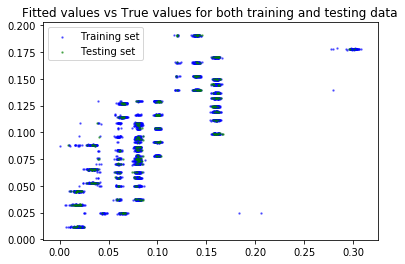

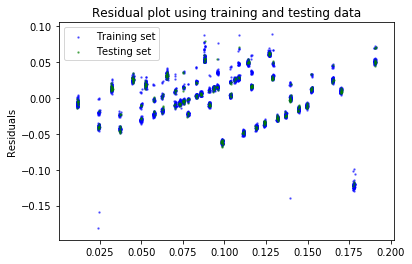

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [31]:
# Workflow 1

analyze_wf_se_lr(data_wf1_enc, target_wf1_enc)

Average train RMSE: 0.14874351053970675
Average test RMSE: 0.14793577104941905


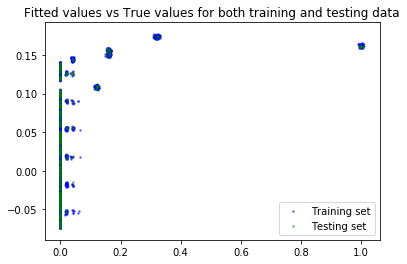

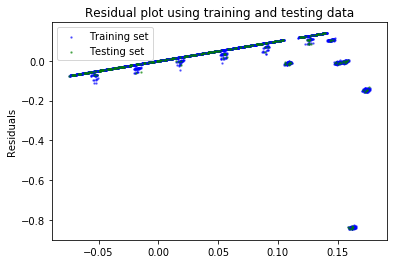

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [33]:
# Workflow 2

analyze_wf_se_lr(data_wf2_enc, target_wf2_enc)

Average train RMSE: 0.04291268216819609
Average test RMSE: 0.04288734965606429


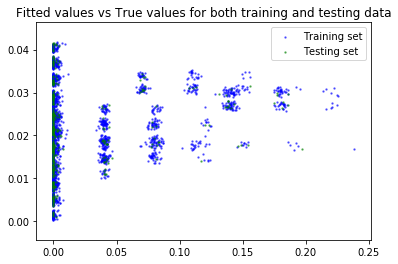

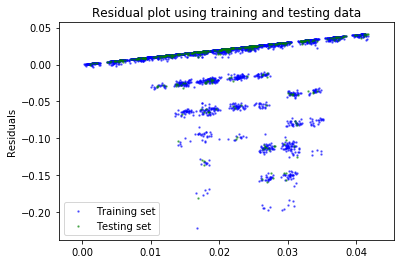

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [35]:
# Workflow 3

analyze_wf_se_lr(data_wf3_enc, target_wf3_enc)

Average train RMSE: 0.0072441743433212065
Average test RMSE: 0.007235033554255374


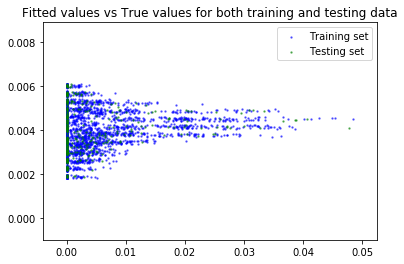

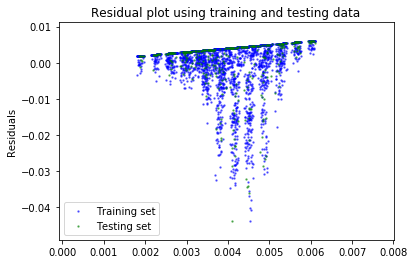

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [37]:
# Workflow 4

analyze_wf_se_lr(data_wf4_enc, target_wf4_enc)

Average train RMSE: 0.08591825005731442
Average test RMSE: 0.0858820485951205


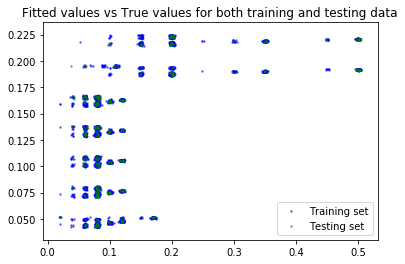

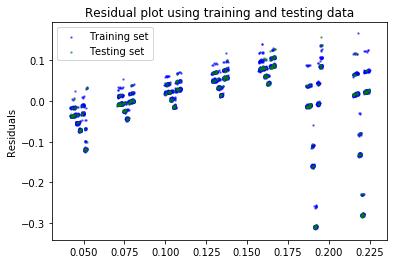

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

#### Polynomial fit

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Get scalar-encoded data per workflow

data_wf0_se = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_se = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_se = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_se = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_se = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_se = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_se = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_se = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_se = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_se = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
# Get data per workflow to be used in one-hot encoding

data_wf0 = train_data[np.where(train_data[:,3]=='work_flow_0')]
target_wf0 = target_data[np.where(train_data[:,3]=='work_flow_0')]
data_wf1 = train_data[np.where(train_data[:,3]=='work_flow_1')]
target_wf1 = target_data[np.where(train_data[:,3]=='work_flow_1')]
data_wf2 = train_data[np.where(train_data[:,3]=='work_flow_2')]
target_wf2 = target_data[np.where(train_data[:,3]=='work_flow_2')]
data_wf3 = train_data[np.where(train_data[:,3]=='work_flow_3')]
target_wf3 = target_data[np.where(train_data[:,3]=='work_flow_3')]
data_wf4 = train_data[np.where(train_data[:,3]=='work_flow_4')]
target_wf4 = target_data[np.where(train_data[:,3]=='work_flow_4')]

In [ ]:
# Define functions to get RMSE's for scalar and one-hot encoded data, with polynomial features.

def analyze_wf_se_poly(data, target, model):

    avg_train_rmse_se = []
    avg_test_rmse_se = []
    for d in degrees:
#         model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_se_poly = pf.fit_transform(data)

        rmse_per_fold_train_se = []
        rmse_per_fold_test_se = []

        for trainset, testset in kf.split(data_se_poly):
            X_train, X_test = data_se_poly[trainset], data_se_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_se.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
            rmse_per_fold_test_se.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

        avg_train_rmse_se.append(np.mean(rmse_per_fold_train_se))
        avg_test_rmse_se.append(np.mean(rmse_per_fold_test_se))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (scalar):', np.mean(rmse_per_fold_train_se))
        print('Average test RMSE (scalar):', np.mean(rmse_per_fold_test_se))
        print(' ')
        
    return avg_train_rmse_se, avg_test_rmse_se
        
def analyze_wf_oh_poly(data, target, model, enc):
    avg_train_rmse_oh = []
    avg_test_rmse_oh = []
    data_oh = enc.transform(data)
    for d in degrees:
        model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_oh_poly = pf.fit_transform(data_oh)

        rmse_per_fold_train_oh = []
        rmse_per_fold_test_oh = []

        for trainset, testset in kf.split(data_oh_poly):
            X_train, X_test = data_oh_poly[trainset], data_oh_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_oh.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
            rmse_per_fold_test_oh.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

        avg_train_rmse_oh.append(np.mean(rmse_per_fold_train_oh))
        avg_test_rmse_oh.append(np.mean(rmse_per_fold_test_oh))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (one hot):', np.mean(rmse_per_fold_train_oh))
        print('Average test RMSE (one hot):', np.mean(rmse_per_fold_test_oh))
        print(' ')
    return avg_train_rmse_oh, avg_test_rmse_oh

In [32]:
degrees = np.arange(2, 11)

enc = OneHotEncoder()
enc.fit(train_data)

In [31]:
# Workflow 0 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf0_se, avg_test_rmse_wf0_se = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

Polynomial degree = 2
Average train RMSE: 0.02951044038920691
Average test RMSE: 0.029613662859018904
 
Polynomial degree = 3
Average train RMSE: 0.02629434670208174
Average test RMSE: 0.02654360601138826
 
Polynomial degree = 4
Average train RMSE: 0.024937018643745208
Average test RMSE: 0.025499661542946674
 
Polynomial degree = 5
Average train RMSE: 0.01820746271582394
Average test RMSE: 0.019017336926334012
 
Polynomial degree = 6
Average train RMSE: 0.01171525197183967
Average test RMSE: 0.012375280473499131
 
Polynomial degree = 7
Average train RMSE: 0.010902552846012988
Average test RMSE: 0.011898845104185183
 
Polynomial degree = 8
Average train RMSE: 0.007997215788659995
Average test RMSE: 0.009304544952191665
 
Polynomial degree = 9
Average train RMSE: 0.007731341503543029
Average test RMSE: 0.009736694267414173
 
Polynomial degree = 10
Average train RMSE: 0.007251467708198773
Average test RMSE: 0.009975921123810533
 


In [ ]:
# Workflow 0 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf0_oh, avg_test_rmse_wf0_oh = analyze_wf_oh_poly(data_wf0, target_wf0, model, enc)

In [32]:
# Workflow 1 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf1_se, avg_test_rmse_wf1_se = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

Polynomial degree = 2
Average train RMSE: 0.1297919798456275
Average test RMSE: 0.12901437001453558
 
Polynomial degree = 3
Average train RMSE: 0.11104582035905311
Average test RMSE: 0.11178565667331156
 
Polynomial degree = 4
Average train RMSE: 0.08928418996574214
Average test RMSE: 0.0914781046468365
 
Polynomial degree = 5
Average train RMSE: 0.06541191170101976
Average test RMSE: 0.0685295474351448
 
Polynomial degree = 6
Average train RMSE: 0.04236074638989835
Average test RMSE: 0.04539583156272584
 
Polynomial degree = 7
Average train RMSE: 0.020775863197712335
Average test RMSE: 0.02293924313717588
 
Polynomial degree = 8
Average train RMSE: 0.008123135169090826
Average test RMSE: 0.009242890118840013
 
Polynomial degree = 9
Average train RMSE: 0.005431470185180092
Average test RMSE: 0.006546173587834646
 
Polynomial degree = 10
Average train RMSE: 0.005218040487372939
Average test RMSE: 0.006879435748659682
 


In [ ]:
# Workflow 1 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf1_oh, avg_test_rmse_wf1_oh = analyze_wf_oh_poly(data_wf1, target_wf1, model, enc)

In [33]:
# Workflow 2 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf2_se, avg_test_rmse_wf2_se = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

Polynomial degree = 2
Average train RMSE: 0.038469473772652724
Average test RMSE: 0.0385899539244161
 
Polynomial degree = 3
Average train RMSE: 0.03446847982109015
Average test RMSE: 0.0347421070404023
 
Polynomial degree = 4
Average train RMSE: 0.031820526389148104
Average test RMSE: 0.03240878692268893
 
Polynomial degree = 5
Average train RMSE: 0.02589519473523245
Average test RMSE: 0.026702761741606414
 
Polynomial degree = 6
Average train RMSE: 0.02338932079294727
Average test RMSE: 0.024786646599526285
 
Polynomial degree = 7
Average train RMSE: 0.021178430875482632
Average test RMSE: 0.023021281915845328
 
Polynomial degree = 8
Average train RMSE: 0.019258703944322532
Average test RMSE: 0.022073000233240592
 
Polynomial degree = 9
Average train RMSE: 0.01783915539839428
Average test RMSE: 0.021674232867814305
 
Polynomial degree = 10
Average train RMSE: 0.01700177307045717
Average test RMSE: 0.02254615140908006
 


In [ ]:
# Workflow 2 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf2_oh, avg_test_rmse_wf2_oh = analyze_wf_oh_poly(data_wf2, target_wf2, model, enc)

In [34]:
# Workflow 3 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf3_se, avg_test_rmse_wf3_se = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

Polynomial degree = 2
Average train RMSE: 0.006377031805983065
Average test RMSE: 0.006388674574617957
 
Polynomial degree = 3
Average train RMSE: 0.006027201340375219
Average test RMSE: 0.006057563814097352
 
Polynomial degree = 4
Average train RMSE: 0.005465499604893323
Average test RMSE: 0.005535095590058599
 
Polynomial degree = 5
Average train RMSE: 0.0049075522518190395
Average test RMSE: 0.005030658256111796
 
Polynomial degree = 6
Average train RMSE: 0.004583960807540666
Average test RMSE: 0.004780491974409369
 
Polynomial degree = 7
Average train RMSE: 0.004362246022418069
Average test RMSE: 0.004679899551504416
 
Polynomial degree = 8
Average train RMSE: 0.004221260713622764
Average test RMSE: 0.0046885825484952
 
Polynomial degree = 9
Average train RMSE: 0.004122221783108753
Average test RMSE: 0.004854734245825539
 
Polynomial degree = 10
Average train RMSE: 0.003995382505784149
Average test RMSE: 0.00507580979575536
 


In [ ]:
# Workflow 3 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf3_oh, avg_test_rmse_wf3_oh = analyze_wf_oh_poly(data_wf3, target_wf3, model, enc)

In [35]:
# Workflow 4 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf4_se, avg_test_rmse_wf4_se = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

Polynomial degree = 2
Average train RMSE: 0.06918408675730581
Average test RMSE: 0.06936409598352632
 
Polynomial degree = 3
Average train RMSE: 0.06124249793351222
Average test RMSE: 0.061777947254377984
 
Polynomial degree = 4
Average train RMSE: 0.0490612557801161
Average test RMSE: 0.04988803187823269
 
Polynomial degree = 5
Average train RMSE: 0.036489002212836054
Average test RMSE: 0.037640453160571005
 
Polynomial degree = 6
Average train RMSE: 0.026036355453070415
Average test RMSE: 0.027655214825443176
 
Polynomial degree = 7
Average train RMSE: 0.020940695846845426
Average test RMSE: 0.023220613252184677
 
Polynomial degree = 8
Average train RMSE: 0.018430519290132737
Average test RMSE: 0.021598381052572474
 
Polynomial degree = 9
Average train RMSE: 0.016041786064178217
Average test RMSE: 0.0205118139665846
 
Polynomial degree = 10
Average train RMSE: 0.014604656877549999
Average test RMSE: 0.021221582973804595
 


In [ ]:
# Workflow 4 - one hot encoded

avg_train_rmse_wf4_oh, avg_test_rmse_wf4_oh = analyze_wf_oh_poly(data_wf4, target_wf4, enc)

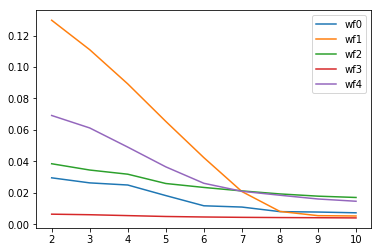

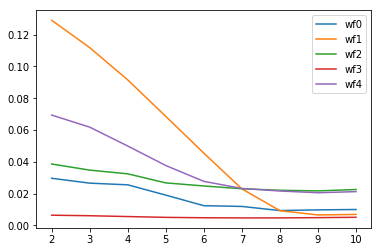

In [36]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0)
plt.plot(degrees, avg_train_rmse_wf1)
plt.plot(degrees, avg_train_rmse_wf2)
plt.plot(degrees, avg_train_rmse_wf3)
plt.plot(degrees, avg_train_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0)
plt.plot(degrees, avg_test_rmse_wf1)
plt.plot(degrees, avg_test_rmse_wf2)
plt.plot(degrees, avg_test_rmse_wf3)
plt.plot(degrees, avg_test_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [34]:
best_deg = 8


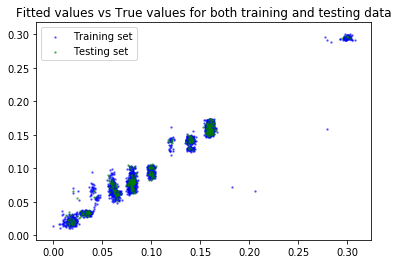

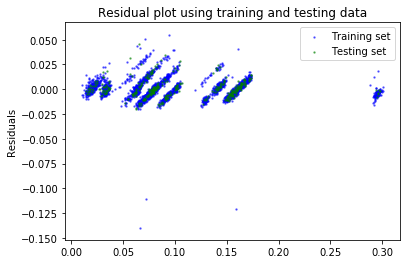

In [35]:
# Workflow 0

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc_poly, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

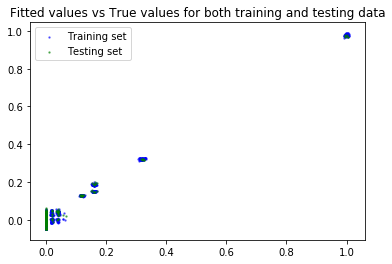

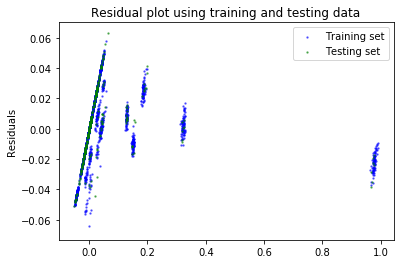

In [36]:
# Workflow 1

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc_poly, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

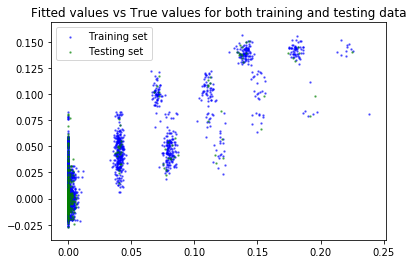

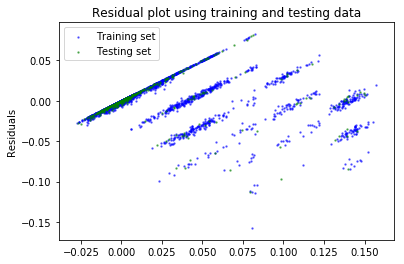

In [38]:
# Workflow 2

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc_poly, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

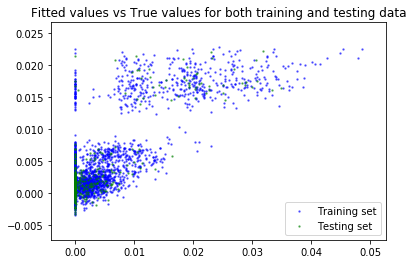

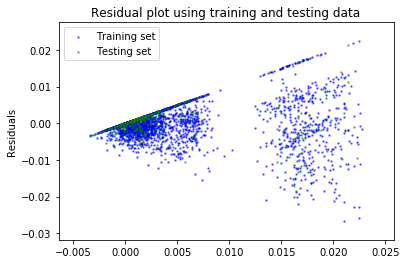

In [39]:
# Workflow 3

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc_poly, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

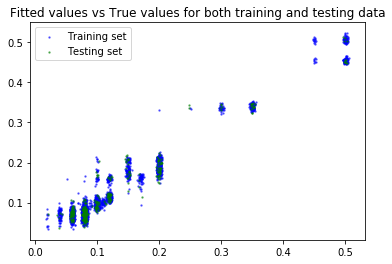

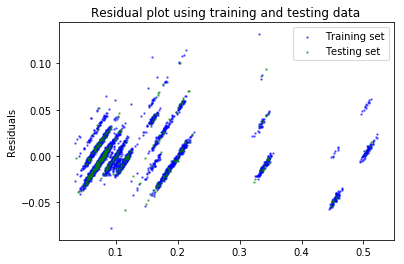

In [40]:
# Workflow 4

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)

rmse_per_fold_train = []
rmse_per_fold_test = []

X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc_poly, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
model = Lasso()

avg_train_rmse_wf0_se_lasso, avg_test_rmse_wf0_se_lasso = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf1_se_lasso, avg_test_rmse_wf1_se_lasso = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf2_se_lasso, avg_test_rmse_wf2_se_lasso = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf3_se_lasso, avg_test_rmse_wf3_se_lasso = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf4_se_lasso, avg_test_rmse_wf4_se_lasso = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_se_lasso)
plt.plot(degrees, avg_train_rmse_wf1_se_lasso)
plt.plot(degrees, avg_train_rmse_wf2_se_lasso)
plt.plot(degrees, avg_train_rmse_wf3_se_lasso)
plt.plot(degrees, avg_train_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average training RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_se_lasso)
plt.plot(degrees, avg_test_rmse_wf1_se_lasso)
plt.plot(degrees, avg_test_rmse_wf2_se_lasso)
plt.plot(degrees, avg_test_rmse_wf3_se_lasso)
plt.plot(degrees, avg_test_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average testing RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

## KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values

In [22]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [32]:
# One hot encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(train_data):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(enc.transform(train_data[trainset]), target_data[trainset])

        predicted_test = knr.predict(enc.transform(train_data[testset]))
        predicted_train = knr.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(np.sqrt(mean_squared_error(target_data[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(target_data[testset], predicted_test)))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.mean(train_rmses))
    print('Average testing RMSE for {} neighbors = '.format(i), np.mean(test_rmses))
    print(' ')
    

Average training RMSE for 2 neighbors =  0.02867788589617355
Average testing RMSE for 2 neighbors =  0.02594575798629799
 
Average training RMSE for 3 neighbors =  0.03136059031554087
Average testing RMSE for 3 neighbors =  0.02379359488330635
 
Average training RMSE for 4 neighbors =  0.035645194518587955
Average testing RMSE for 4 neighbors =  0.02352168412113564
 
Average training RMSE for 5 neighbors =  0.03505240653841058
Average testing RMSE for 5 neighbors =  0.02228216101935084
 
Average training RMSE for 6 neighbors =  0.034653932706211275
Average testing RMSE for 6 neighbors =  0.021599501748946197
 
Average training RMSE for 7 neighbors =  0.034140258612036
Average testing RMSE for 7 neighbors =  0.02117718381080623
 
Average training RMSE for 8 neighbors =  0.03360957497364643
Average testing RMSE for 8 neighbors =  0.020584536533204197
 
Average training RMSE for 9 neighbors =  0.03328416345564402
Average testing RMSE for 9 neighbors =  0.0201964064787764
 
Average trainin

In [31]:
# Scalar encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(X_encoded):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(X_encoded[trainset], Y_encoded[trainset])

        predicted_test = knr.predict(X_encoded[testset])
        predicted_train = knr.predict(X_encoded[trainset])
        
        train_rmses.append(np.sqrt(mean_squared_error(Y_encoded[trainset], predicted_train)))
        test_rmses.append(np.sqrt(mean_squared_error(Y_encoded[testset], predicted_test)))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.mean(train_rmses))
    print('Average testing RMSE for {} neighbors = '.format(i), np.mean(test_rmses))
    print(' ')
    

Average training RMSE for 2 neighbors =  0.02880732305181837
Average testing RMSE for 2 neighbors =  0.04346226123484685
 
Average training RMSE for 3 neighbors =  0.029217136599226173
Average testing RMSE for 3 neighbors =  0.03614351161712234
 
Average training RMSE for 4 neighbors =  0.027991838565719913
Average testing RMSE for 4 neighbors =  0.033617798600295595
 
Average training RMSE for 5 neighbors =  0.027523328897841426
Average testing RMSE for 5 neighbors =  0.034878721832935014
 
Average training RMSE for 6 neighbors =  0.029694173097403374
Average testing RMSE for 6 neighbors =  0.03854829572008403
 
Average training RMSE for 7 neighbors =  0.03358349243106502
Average testing RMSE for 7 neighbors =  0.042689994739705035
 
Average training RMSE for 8 neighbors =  0.037278028155526985
Average testing RMSE for 8 neighbors =  0.04524537581782938
 
Average training RMSE for 9 neighbors =  0.039799637409272434
Average testing RMSE for 9 neighbors =  0.04667608513518893
 
Average

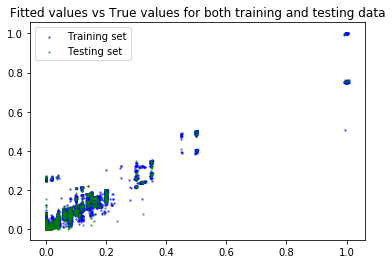

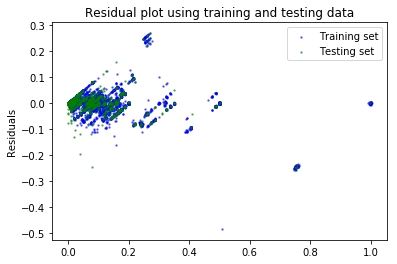

In [33]:
knr = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=0)
knr.fit(X_train, y_train)

model_scatter_plots(knr, X_train, y_train, X_test, y_test)